In [10]:
pip install folium



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
data_path = '/Users/sghong/Downloads/crash.csv'
data = pd.read_csv(data_path, header=0, encoding='ISO-8859-1')
#print("Number of columns:", data.shape[1])
#print("Column labels:", data.columns.tolist())

In [24]:
X = data.iloc[:, [28, 29]]
X

,Latitude,Longitude
0,39.168915,-86.533563
1,0.000000,0.000000
2,39.169065,-86.516155
3,39.155550,-86.504470
4,39.207728,-86.574332
...,...,...
3843,39.144496,-86.518816
3844,39.221483,-86.606163
3845,39.172410,-86.547110
3846,39.165654,-86.498946


# cluster in graph

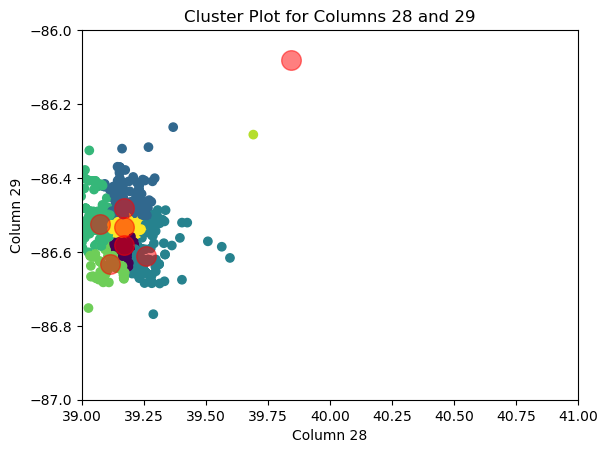

In [40]:


# Select the columns and handle NaNs
X = data.iloc[:, [28, 29]]
X = X.dropna()  # or use X.fillna(X.mean()) to impute

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# Predict the clusters
labels = kmeans.predict(X)

# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# Set the x and y limits
plt.xlim(39, 41)
plt.ylim(-87, -86)

plt.title('Cluster Plot for Columns 28 and 29')
plt.xlabel('Column 28')
plt.ylabel('Column 29')
plt.show()


# Cluster in maps

In [39]:
X = data.iloc[:, [28, 29]]
X.columns = ['Latitude', 'Longitude']  # Rename columns for clarity
X = X.dropna()  # Remove rows with NaN values

# Fit KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
labels = kmeans.predict(X)

# Verify that X and labels have the same number of elements
assert len(X) == len(labels), "Mismatch in the number of data points and labels"

# Create a map centered around the average coordinates
map_center = [X['Latitude'].mean(), X['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)  # Adjust zoom_start based on your preference

# Define a list of colors for each cluster
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen'
]

# Ensure there are enough colors for the number of clusters
if len(colors) < kmeans.n_clusters:
    raise ValueError("Not enough colors for the number of clusters")

# Add cluster points to the map
for idx, (index, point) in enumerate(X.iterrows()):
    cluster_color = colors[labels[idx]]  # Assign color based on cluster label
    folium.CircleMarker(
        location=[point['Latitude'], point['Longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.6
    ).add_to(mymap)

# Add cluster centers to the map
for center_idx, center in enumerate(centers):
    folium.Marker(
        location=[center[0], center[1]],
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# Display the map
mymap